# Output variable -> y y -> Whether the client has subscribed a term deposit or not Binomial ("yes" or "no")

In [118]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [119]:
claimants= pd.read_csv('E:DATA SETS/bank-full.csv')
claimants.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [120]:
claimants.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [121]:
claimants.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [122]:
claimants['default']=claimants['default'].map({'no':1,'yes':-1,'unknown':0})
claimants['housing']=claimants['housing'].map({'no':1,'yes':-1,'unknown':0})
claimants['loan']=claimants['loan'].map({'no':1,'yes':-1,'unknown':0})
claimants['poutcome']=claimants['poutcome'].map({'success':1,'failure':-1,'unknown':0})

claimants['contact']=claimants['contact'].map({'cellular':1,'telephone':1,'unknown':0})

In [123]:
claimants.head(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,1,2143,-1,1,0,5,may,261,1,-1,0,0.0,no
1,44,technician,single,secondary,1,29,-1,1,0,5,may,151,1,-1,0,0.0,no
2,33,entrepreneur,married,secondary,1,2,-1,-1,0,5,may,76,1,-1,0,0.0,no
3,47,blue-collar,married,unknown,1,1506,-1,1,0,5,may,92,1,-1,0,0.0,no
4,33,unknown,single,unknown,1,1,1,1,0,5,may,198,1,-1,0,0.0,no
5,35,management,married,tertiary,1,231,-1,1,0,5,may,139,1,-1,0,0.0,no
6,28,management,single,tertiary,1,447,-1,-1,0,5,may,217,1,-1,0,0.0,no
7,42,entrepreneur,divorced,tertiary,-1,2,-1,1,0,5,may,380,1,-1,0,0.0,no
8,58,retired,married,primary,1,121,-1,1,0,5,may,50,1,-1,0,0.0,no
9,43,technician,single,secondary,1,593,-1,1,0,5,may,55,1,-1,0,0.0,no


In [124]:
claimants['y']=claimants['y'].map({'yes':1,'no':0})

In [125]:
claimants.drop(columns = {'age','job','marital','education' }, inplace = True)

In [126]:
claimants.shape

(45211, 13)

In [127]:
claimants.drop(columns = {'month'}, inplace = True)

In [128]:
x=claimants.iloc[:,0:10]
y=claimants.iloc[:,11]

In [129]:
classifier = LogisticRegression()
classifier.fit(x,y)

C:\Users\Win-10\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [130]:
y_pred = classifier.predict(x)

In [131]:
y_pred_df= pd.DataFrame({'actual': y,
                         'predicted_prob': classifier.predict(x)})

In [132]:
y_pred_df

,actual,predicted_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0


In [133]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y,y_pred)
print (confusion_matrix)

[[38940   982]
 [ 4265  1024]]


In [134]:
100*(38940+1024)/(38940+982+4265+1024)

88.39441728782819

In [135]:
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))


              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.51      0.19      0.28      5289

    accuracy                           0.88     45211
   macro avg       0.71      0.58      0.61     45211
weighted avg       0.86      0.88      0.86     45211



In [136]:
y_pred,

(array([0, 0, 0, ..., 1, 0, 0], dtype=int64),)

In [137]:
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

Text(0, 0.5, 'True Positive Rate')

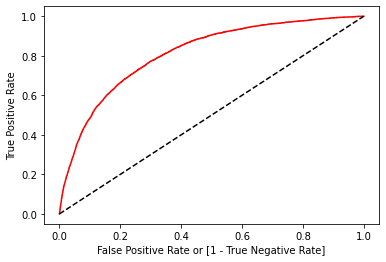

In [138]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(y, classifier.predict_proba(x)[:,1])

auc = roc_auc_score(y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')